In [1]:
import os,sys
import pandas as pd
import numpy as np
from scipy import stats
# importing ploting libraries
import matplotlib.pyplot as plt
#importing seaborn for statistical plots
import seaborn as sns
sns.distributions._has_statsmodels=False
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, classification_report, confusion_matrix,auc
from sklearn.metrics import recall_score,precision_score, f1_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# Set color code,font scale..
sns.set(color_codes=True,rc={'figure.figsize':(35.0,35.0)},font_scale=1)
%matplotlib inline 

# Let's load the packages
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

df1 = pd.read_csv(r"frequency_domain_features_train_v1.csv")
df2 = pd.read_csv(r"heart_rate_non_linear_features_train_V1.csv")
df3 = pd.read_csv(r"time_domain_features_train_V1.csv")

object_columns_list = list(df1.select_dtypes(include='object').columns)

for object_column in object_columns_list:
    df1[object_column] = df1[object_column].astype(str)

In [2]:
mid_res = pd.merge(df1,df2,how='outer',on='uuid') 
dataframe_hrv = pd.merge(mid_res,df3,how='outer',on='uuid')

In [3]:
dataframe_hrv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369289 entries, 0 to 369288
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   uuid               369289 non-null  object 
 1   VLF_PCT            369289 non-null  float64
 2   LF_PCT             369289 non-null  float64
 3   LF_NU              369289 non-null  float64
 4   HF_PCT             369289 non-null  float64
 5   HF_NU              369289 non-null  float64
 6   TP                 369289 non-null  float64
 7   LF_HF              369289 non-null  float64
 8   sampen             369289 non-null  float64
 9   higuci             369289 non-null  float64
 10  condition          369289 non-null  object 
 11  SD1_SD2 Ratio      369289 non-null  float64
 12  SDRR_RMSSD         369289 non-null  float64
 13  HR                 369289 non-null  float64
 14  pNN50              369289 non-null  float64
 15  KURT               369289 non-null  float64
 16  SK

In [4]:
dataframe_hrv = dataframe_hrv.drop('uuid', axis=1)

In [5]:
values_replace = {
    "condition" : {"interruption" :1,"no stress":2,"time pressure":3 }
}
dataframe_hrv = dataframe_hrv.replace(values_replace)

In [6]:
dataframe_hrv.head()

VLF_PCT     LF_PCT      LF_NU    HF_PCT     HF_NU           TP  \
0  72.203287  27.375666  98.485263  0.421047  1.514737  3686.666157   
1  76.975728  22.954139  99.695397  0.070133  0.304603  3006.487251   
2  51.152225  48.335104  98.950472  0.512671  1.049528  2685.879461   
3  70.180308  29.290305  98.224706  0.529387  1.775294  3434.520980   
4  43.918366  54.242160  96.720007  1.839473  3.279993  2621.175204   

        LF_HF    sampen    higuci  condition  SD1_SD2 Ratio  SDRR_RMSSD  \
0   65.018055  2.139754  1.163485          2       0.055267    9.063146   
1  327.296635  2.174499  1.084711          1       0.079995    6.272369   
2   94.280910  2.135350  1.176315          1       0.096969    5.182201   
3   55.328701  2.178341  1.179688          2       0.087336    5.748591   
4   29.487873  2.221121  1.249612          2       0.154935    3.266724   

          HR     pNN50      KURT      SKEW  SDSD_REL_RR  SDRR_RMSSD_REL_RR  \
0  69.499952  0.533333 -0.856554  0.335218     0.007969           2.143342   
1  64.363150  0.000000 -0.408190 -0.155286     0.004769           2.930855   
2  67.450066  0.200000  0.351789 -0.656813     0.008716           2.127053   
3  68.809562  0.133333 -0.504947 -0.386138     0.008660           2.050988   
4  74.565728  0.200000 -0.548408 -0.154252     0.013055           1.816544   

   KURT_REL_RR  SKEW_REL_RR  
0    -0.856554     0.335218  
1    -0.408190    -0.155286  
2     0.351789    -0.656813  
3    -0.504947    -0.386138  
4    -0.548408    -0.154252

In [7]:
dataframe_hrv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369289 entries, 0 to 369288
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   VLF_PCT            369289 non-null  float64
 1   LF_PCT             369289 non-null  float64
 2   LF_NU              369289 non-null  float64
 3   HF_PCT             369289 non-null  float64
 4   HF_NU              369289 non-null  float64
 5   TP                 369289 non-null  float64
 6   LF_HF              369289 non-null  float64
 7   sampen             369289 non-null  float64
 8   higuci             369289 non-null  float64
 9   condition          369289 non-null  int64  
 10  SD1_SD2 Ratio      369289 non-null  float64
 11  SDRR_RMSSD         369289 non-null  float64
 12  HR                 369289 non-null  float64
 13  pNN50              369289 non-null  float64
 14  KURT               369289 non-null  float64
 15  SKEW               369289 non-null  float64
 16  SD

In [9]:
dataframe_hrv.describe()

VLF_PCT         LF_PCT          LF_NU         HF_PCT  \
count  369289.000000  369289.000000  369289.000000  369289.000000   
mean       64.289242      34.095182      95.566718       1.615576   
std        16.774844      16.040290       4.123365       1.761073   
min        19.031219       2.165119      69.879083       0.002150   
25%        52.909877      22.305936      93.645734       0.346803   
50%        66.350237      32.047025      96.643140       1.039513   
75%        76.825032      44.647115      98.771946       2.245115   
max        97.738848      77.928847      99.987175      13.095664   

               HF_NU             TP          LF_HF         sampen  \
count  369289.000000  369289.000000  369289.000000  369289.000000   
mean        4.433282    3185.356025     115.977200       2.062471   
std         4.123365    1923.227187     360.855129       0.206999   
min         0.012825     377.692795       2.319952       0.434576   
25%         1.228054    1828.147788      14.737458       2.032977   
50%         3.356860    2796.856587      28.789747       2.134214   
75%         6.354266    4052.260157      80.429614       2.181929   
max        30.120917   13390.684100    7796.443096       2.234841   

              higuci      condition  SD1_SD2 Ratio     SDRR_RMSSD  \
count  369289.000000  369289.000000  369289.000000  369289.000000   
mean        1.182292       1.888724       0.086593       7.396597   
std         0.062192       0.667694       0.035197       5.143834   
min         1.033984       1.000000       0.009142       2.660381   
25%         1.139929       1.000000       0.063277       4.541896   
50%         1.174293       2.000000       0.084329       5.952112   
75%         1.223621       2.000000       0.110795       7.919841   
max         1.361219       3.000000       0.191418      54.523950   

                  HR          pNN50           KURT           SKEW  \
count  369289.000000  369289.000000  369289.000000  369289.000000   
mean       73.941824       0.866001       0.523235       0.041628   
std        10.337453       0.990189       1.790348       0.699522   
min        48.737243       0.000000      -1.894820      -2.136278   
25%        66.715776       0.000000      -0.352783      -0.359291   
50%        74.217809       0.466667       0.040736      -0.060966   
75%        80.334937       1.466667       0.722833       0.282417   
max       113.752308       5.466667      64.088107       6.777800   

         SDSD_REL_RR  SDRR_RMSSD_REL_RR    KURT_REL_RR    SKEW_REL_RR  
count  369289.000000      369289.000000  369289.000000  369289.000000  
mean        0.009701           2.006817       0.523235       0.041628  
std         0.003897           0.375845       1.790348       0.699522  
min         0.003220           1.169342      -1.894820      -2.136278  
25%         0.006984           1.749801      -0.352783      -0.359291  
50%         0.008691           1.934416       0.040736      -0.060966  
75%         0.011460           2.221232       0.722833       0.282417  
max         0.026955           3.724134      64.088107       6.777800

In [8]:
dataframe_hrv.isna().sum()

VLF_PCT              0
LF_PCT               0
LF_NU                0
HF_PCT               0
HF_NU                0
TP                   0
LF_HF                0
sampen               0
higuci               0
condition            0
SD1_SD2 Ratio        0
SDRR_RMSSD           0
HR                   0
pNN50                0
KURT                 0
SKEW                 0
SDSD_REL_RR          0
SDRR_RMSSD_REL_RR    0
KURT_REL_RR          0
SKEW_REL_RR          0
dtype: int64

In [ ]:
columns = list(dataframe_hrv)[:]
dataframe_hrv[columns].hist(bins=100,figsize = (15,12))

In [ ]:
sns.pairplot(dataframe_hrv)

In [ ]:
dataframe_hrv.corr()

In [ ]:
sns.heatmap(dataframe_hrv.corr())

In [9]:
from sklearn import preprocessing
standardized = preprocessing.scale(dataframe_hrv)
dataframe_hrv_std = pd.DataFrame(standardized)




In [10]:
dataframe_hrv_cols= dataframe_hrv.columns
dataframe_hrv_cols

Index(['VLF_PCT', 'LF_PCT', 'LF_NU', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF',
       'sampen', 'higuci', 'condition', 'SD1_SD2 Ratio', 'SDRR_RMSSD', 'HR',
       'pNN50', 'KURT', 'SKEW', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR',
       'KURT_REL_RR', 'SKEW_REL_RR'],
      dtype='object')

In [11]:
dataframe_hrv_std.columns = dataframe_hrv_cols
dataframe_hrv_std.head()

VLF_PCT    LF_PCT     LF_NU    HF_PCT     HF_NU        TP     LF_HF  \
0  0.471781 -0.418915  0.707808 -0.678297 -0.707808  0.260661 -0.141218   
1  0.756281 -0.694567  1.001290 -0.877559 -1.001290 -0.093005  0.585608   
2 -0.783139  0.887761  0.820630 -0.626270 -0.820630 -0.259708 -0.060125   
3  0.351185 -0.299551  0.644617 -0.616778 -0.644617  0.129556 -0.168069   
4 -1.214372  1.256025  0.279697  0.127137 -0.279697 -0.293352 -0.239679   

     sampen    higuci  condition  SD1_SD2 Ratio  SDRR_RMSSD        HR  \
0  0.373348 -0.302406   0.166657      -0.890008    0.323990 -0.429688   
1  0.541198 -1.569039  -1.331036      -0.187465   -0.218559 -0.926600   
2  0.352071 -0.096115  -1.331036       0.294804   -0.430496 -0.627985   
3  0.559758 -0.041875   0.166657       0.021112   -0.320385 -0.496473   
4  0.766427  1.082438   0.166657       1.941707   -0.802879  0.060354   

      pNN50      KURT      SKEW  SDSD_REL_RR  SDRR_RMSSD_REL_RR  KURT_REL_RR  \
0 -0.335965 -0.770683  0.419702    -0.444636           0.363248    -0.770683   
1 -0.874583 -0.520249 -0.281499    -1.265786           2.458566    -0.520249   
2 -0.672601 -0.095761 -0.998456    -0.252953           0.319909    -0.095761   
3 -0.739928 -0.574293 -0.611513    -0.267325           0.117524    -0.574293   
4 -0.672601 -0.598568 -0.280021     0.860681          -0.506257    -0.598568   

   SKEW_REL_RR  
0     0.419702  
1    -0.281499  
2    -0.998456  
3    -0.611513  
4    -0.280021

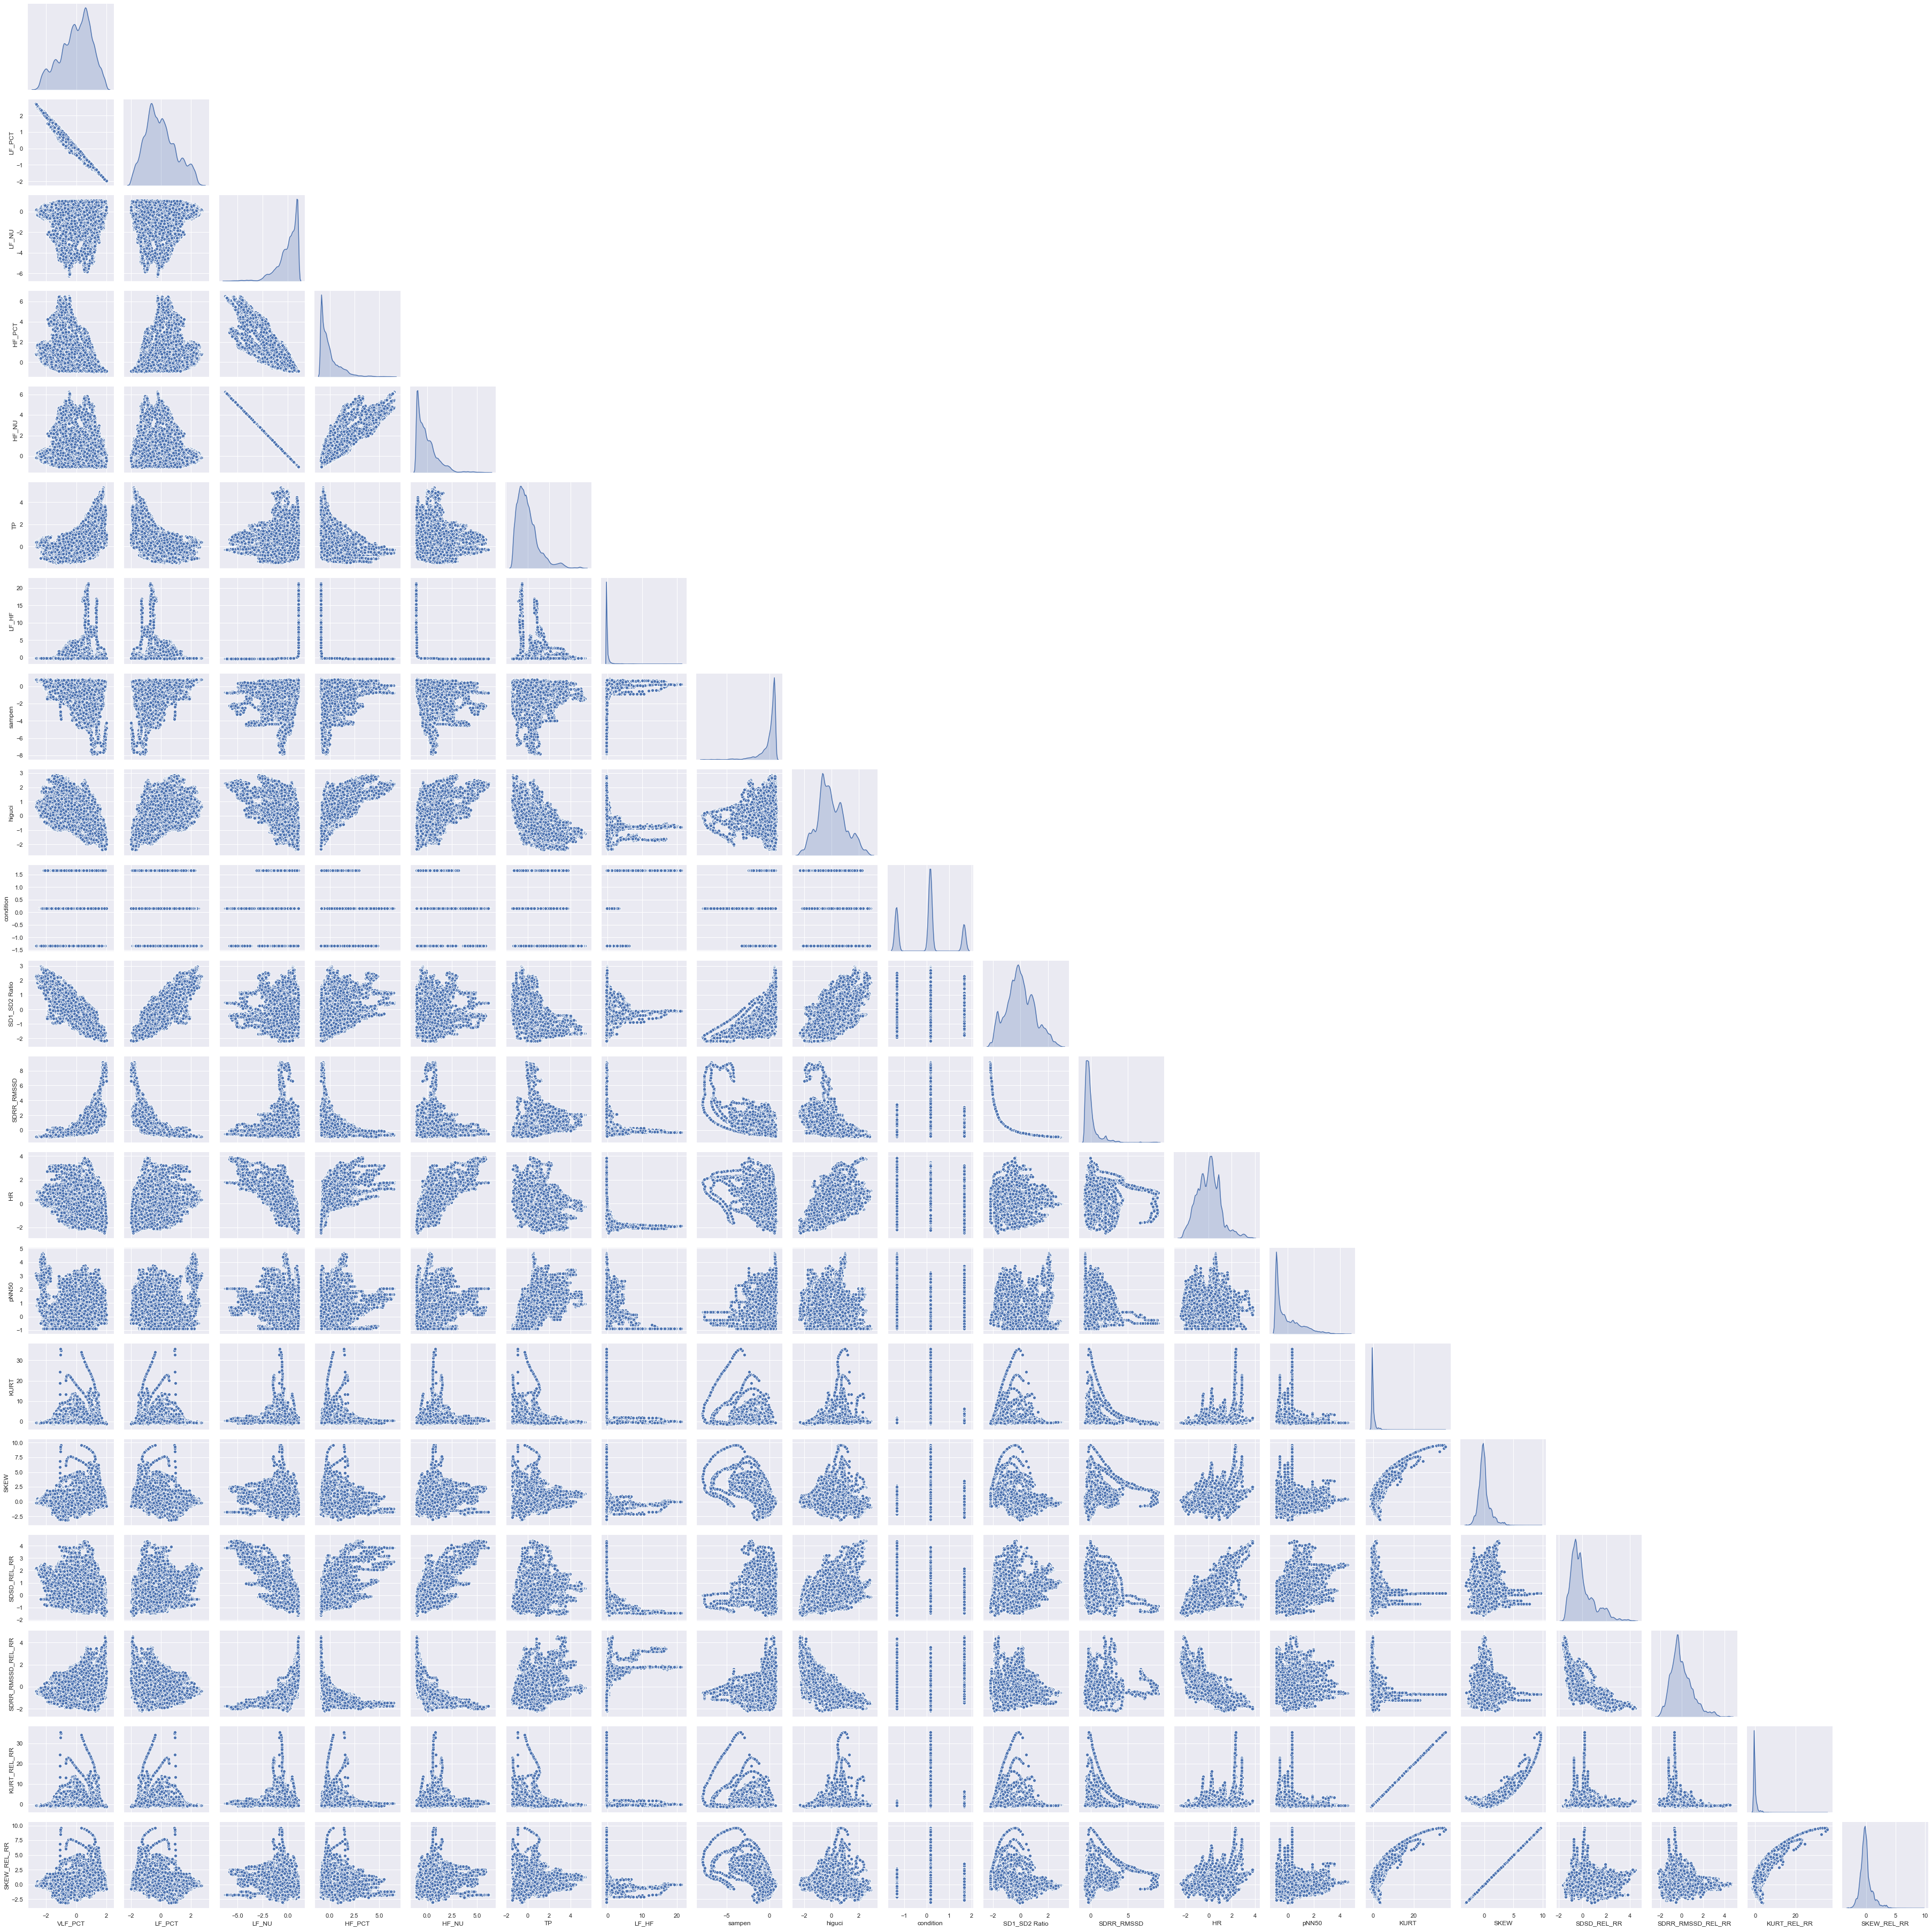

In [17]:
data = dataframe_hrv_std
sns.pairplot(data,corner=True,diag_kind="kde")

In [18]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = dataframe_hrv_std.drop('HR', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = dataframe_hrv_std[['HR']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [20]:
ln_reg = LinearRegression()
ln_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
ln_reg.score(X_test,y_test)

0.8172527733505274

In [23]:
pred_ln= ln_reg.predict(X_test)
from sklearn import metrics
metrics.mean_absolute_error(y_test,pred_ln)

0.3187750309912699

In [24]:
from sklearn.linear_model import Lasso
lasso = Lasso()

lasso.fit(X_train,y_train)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [25]:
lasso.score(X_test,y_test)

-7.579329671880686e-06

In [26]:
pred_lasso= lasso.predict(X_test)
metrics.mean_absolute_error(y_test,pred_lasso)

0.7878754093427522

In [27]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [28]:
ridge.score(X_test,y_test)

0.8172517779720632

In [29]:
pred_ridge= ridge.predict(X_test)
metrics.mean_absolute_error(y_test,pred_ridge)

0.3187771981543125

In [30]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor()

dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [31]:
dec_tree.score(X_test,y_test)

0.9994688459460436

In [32]:
pred_dt= dec_tree.predict(X_test)
metrics.mean_absolute_error(y_test,pred_dt)

0.002624580670407096

In [33]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train,y_train)

C:\Users\kavya\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [34]:
pred_rf= rf_reg.predict(X_test)
metrics.mean_absolute_error(y_test,pred_rf)

0.0025925015201669305

In [35]:
rf_reg.score(X_test,y_test)

0.9998305203490739

In [36]:
from sklearn.ensemble import BaggingRegressor
bagging = BaggingRegressor()
bagging.fit(X_train,y_train)

C:\Users\kavya\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:399: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [37]:
bagging.score(X_test,y_test)

0.9997424386196283

In [39]:
pred_bagging= bagging.predict(X_test)
metrics.mean_absolute_error(y_test,pred_bagging)

0.003020981119727187

In [40]:
from sklearn.ensemble import GradientBoostingRegressor
gboost = GradientBoostingRegressor()
gboost.fit(X_train,y_train)

C:\Users\kavya\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [41]:
gboost.score(X_test,y_test)

0.9367245767569763

In [42]:
pred_gboost= gboost.predict(X_test)
metrics.mean_absolute_error(y_test,pred_gboost)

0.18607679871536295

In [43]:
rf = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
rf.fit(X_train, y_train)

C:\Users\kavya\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=-1, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [44]:
rf.feature_importances_

array([0.00961707, 0.00903137, 0.11892967, 0.36138258, 0.07435358,
       0.01922755, 0.12417556, 0.0171615 , 0.03274877, 0.01777554,
       0.01453279, 0.015897  , 0.01532642, 0.00807915, 0.03321056,
       0.07364353, 0.01832073, 0.00869253, 0.0278941 ])

In [45]:
import pandas as pd
important_features = pd.Series(data=rf.feature_importances_,index=X_train.columns)
important_features.sort_values(ascending=False,inplace=True)
important_features

HF_PCT               0.361383
LF_HF                0.124176
LF_NU                0.118930
HF_NU                0.074354
SDSD_REL_RR          0.073644
SKEW                 0.033211
higuci               0.032749
SKEW_REL_RR          0.027894
TP                   0.019228
SDRR_RMSSD_REL_RR    0.018321
condition            0.017776
sampen               0.017162
SDRR_RMSSD           0.015897
pNN50                0.015326
SD1_SD2 Ratio        0.014533
VLF_PCT              0.009617
LF_PCT               0.009031
KURT_REL_RR          0.008693
KURT                 0.008079
dtype: float64

In [46]:
pred_rf= rf.predict(X_test)
metrics.mean_absolute_error(y_test,pred_rf)

0.0038502914114036304

In [47]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [48]:
folds =10
k_fold = KFold(n_splits = folds,random_state=1)
model = LinearRegression()

ln_result = cross_val_score(model,X,y,cv=k_fold, scoring = 'neg_mean_absolute_error')
print(ln_result)
print("Accuracy: %.3f%% (%.3f%%)" % (ln_result.mean()*100.0, ln_result.std()*100.0))
ln_score = ln_result.mean()*100.0

C:\Users\kavya\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[-0.32000425 -0.32019859 -0.31887252 -0.32088387 -0.3198639  -0.31938565
 -0.31926174 -0.31883711 -0.31929973 -0.32243391]
Accuracy: -31.990% (0.103%)


In [49]:
model = DecisionTreeRegressor()

dec_result = cross_val_score(model,X,y,cv=k_fold, scoring = 'neg_mean_absolute_error')
print(dec_result)
print("Accuracy: %.3f%% (%.3f%%)" % (dec_result.mean()*100.0, dec_result.std()*100.0))
dec_score = dec_result.mean()*100.0

[-0.00212458 -0.00213868 -0.00199436 -0.00193429 -0.00195864 -0.00194307
 -0.00197997 -0.00210727 -0.00191899 -0.00203413]
Accuracy: -0.201% (0.008%)


In [ ]:
model = RandomForestRegressor()

rf_result = cross_val_score(model,X,y,cv=k_fold, scoring = 'neg_mean_absolute_error')
print(rf_result)
print("Accuracy: %.3f%% (%.3f%%)" % (rf_result.mean()*100.0, rf_result.std()*100.0))
rf_score = rf_result.mean()*100.0

C:\Users\kavya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kavya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [ ]:
rf = RandomForestRegressor(n_estimators=50)
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
rf_random.fit(X_train,y_train)

In [ ]:
randomSearchCV.score(X_test,y_test)

In [ ]:
pred_rf_GS= rf_random.predict(X_test)
metrics.mean_absolute_error(y_test,pred_rf_GS)

In [ ]:
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(clf, param_grid=param_grid)
grid_search.fit(X, y)

In [ ]:
pred_rf_GS= grid_search.predict(X_test)
metrics.mean_absolute_error(y_test,pred_rf_GS)

MEDIAN_RR                  0.480408

MEAN_RR                    0.292381

HF_PCT                     0.077685

HF_NU                      0.049392

HF_LF                      0.024874

LF_HF                      0.018726

LF_NU                      0.017613

SDSD_REL_RR                0.008657

RMSSD_REL_RR               0.003677

SDRR                       0.003232

SD2                        0.003202

sampen                     0.002760

HF                         0.002426

SDRR_RMSSD                 0.002088

SKEW_REL_RR                0.001507

SDRR_REL_RR                0.001207

SDRR_RMSSD_REL_RR          0.001061

condition_no stress        0.000912

higuci                     0.000912

SKEW                       0.000884

KURT                       0.000878

SDSD                       0.000710

VLF_PCT                    0.000665

KURT_REL_RR                0.000518

LF_PCT                     0.000502

pNN25                      0.000494

TP                         0.000492

In [ ]:
selected_x_columns = ['HR', 'MEDIAN_RR', 'MEAN_RR', 'HF_PCT', 'HF_PCT', 'LF_HF', 'LF_NU','SDSD_REL_RR','RMSSD_REL_RR']
latest = dataframe_hrv[selected_x_columns]
display(latest.head(5))

# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = latest.drop('HR', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = latest[['HR']]

In [ ]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = dataframe_hrv.drop('HR', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = dataframe_hrv[['HR']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

rf = RandomForestRegressor(n_estimators=100, min_samples_leaf=5, max_features=0.5, n_jobs=-1, oob_score=True)
rf.fit(X_train, y_train)

In [ ]:
pred= rf.predict(X_test)
from sklearn import metrics
metrics.mean_absolute_error(y_test,pred)

In [ ]:
selected_x_columns = ['HR', 'MEDIAN_RR', 'MEAN_RR', 'HF_PCT', 'HF_PCT', 'LF_HF', 'LF_NU','SDSD_REL_RR','RMSSD_REL_RR','SDRR','SD2']
latest = dataframe_hrv[selected_x_columns]
display(latest.head(5))

# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = latest.drop('HR', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = latest[['HR']]

In [ ]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = dataframe_hrv.drop('HR', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = dataframe_hrv[['HR']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

rf = RandomForestRegressor(n_estimators=100,n_jobs=-1)
rf.fit(X_train, y_train)

In [ ]:
pred= rf.predict(X_test)
from sklearn import metrics
metrics.mean_absolute_error(y_test,pred)

In [ ]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = dataframe_hrv.drop('HR', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = dataframe_hrv[['HR']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

rf = RandomForestRegressor(n_estimators=120,n_jobs=-1)
rf.fit(X_train, y_train)

In [ ]:
pred= rf.predict(X_test)
from sklearn import metrics
metrics.mean_absolute_error(y_test,pred)

In [ ]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = dataframe_hrv.drop('HR', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = dataframe_hrv[['HR']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

rf = RandomForestRegressor(n_estimators=250,n_jobs=-1)
rf.fit(X_train, y_train)

pred= rf.predict(X_test)
from sklearn import metrics
metrics.mean_absolute_error(y_test,pred)

In [ ]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = dataframe_hrv.drop('HR', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = dataframe_hrv[['HR']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

rf = RandomForestRegressor(n_estimators=300,n_jobs=-1)
rf.fit(X_train, y_train)

pred= rf.predict(X_test)
from sklearn import metrics
metrics.mean_absolute_error(y_test,pred)

In [ ]:
df1 = pd.read_csv(r"frequency_domain_features_test.csv")
df2 = pd.read_csv(r"heart_rate_non_linear_features_test.csv")
df3 = pd.read_csv(r"time_domain_features_test.csv")

object_columns_list = list(df1.select_dtypes(include='object').columns)

for object_column in object_columns_list:
    df1[object_column] = df1[object_column].astype(str)
    
mid_res = pd.merge(df1,df2,how='outer',on='uuid') 
testData = pd.merge(mid_res,df3,how='outer',on='uuid')

testData.info()

In [ ]:

# Convert categorical variable into dummy/indicator variables. As many columns will be created as distinct values
# This is also kown as one hot coding. The column names will be America, Europe and Asia... with one hot coding
testData = pd.get_dummies(testData, columns=['condition'])
pred= rf.predict(testData)


In [ ]:
pred

In [ ]:
df1 = pd.read_csv(r"frequency_domain_features_test.csv")
df2 = pd.read_csv(r"heart_rate_non_linear_features_test.csv")
df3 = pd.read_csv(r"time_domain_features_test.csv")

object_columns_list = list(df1.select_dtypes(include='object').columns)

for object_column in object_columns_list:
    df1[object_column] = df1[object_column].astype(str)
    
mid_res = pd.merge(df1,df2,how='outer',on='uuid') 
testData = pd.merge(mid_res,df3,how='outer',on='uuid')

testData.info()

In [ ]:
ids=testData['uuid']

ids.shape

In [ ]:
pred.shape

In [ ]:
df = pd.DataFrame({'UUID':ids, 'HR':pred})
df.reset_index()

In [ ]:
print(df)

In [ ]:
# function that takes in a dataframe and creates a text link to  
# download it (will only work for files < 2MB or so)
# import the modules we'll need
from IPython.display import HTML
import pandas as pd
import numpy as np
import base64

def create_download_link(df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv(index=False)
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

In [ ]:
create_download_link(df)